In [115]:
## MP 573 Lecture 10: More Sampling
##
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
%matplotlib inline
#%matplotlib notebook
import numpy as np
import numpy.linalg as alg
from IPython.display import display, Image, HTML
import matplotlib.image as mpimg
from os.path import dirname, join as pjoin
import scipy.io as sio
from scipy import signal
import math 
from PIL import Image

In [116]:
# Load some image from file
data_dir = pjoin('.', 'data')
mat_fname = pjoin(data_dir, 'lecture015_example.mat')
mat_contents = sio.loadmat(mat_fname)
mat_contents
f = mat_contents['f1']
f = f[::2,::2].astype('float')
sx = len(f)
sy = len(f[:])
h = mat_contents['h']

h = h[::2,::2].astype('float')
#h = 0*h
#h[95:96,95:96] = 1.0

#h = h + 0.0001
#h = h/sum(sum(h))


In [117]:
a = int(sx-np.ceil(sx/2))
b = int(sx+np.floor(sx/2))


2.142168021654937e-16


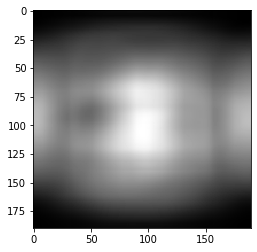

In [118]:
# Compute circular convolution
f2 = signal.convolve2d(h, f, mode='full', boundary='wrap')
a = int(sx-np.ceil(sx/2))
b = int(sx+np.floor(sx/2))
f2 = f2[a:b,a:b]

# Compute circular convolution using the FFT
fhat = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(f)))
hhat = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(h)))
f3 = np.real(np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(fhat*hhat))))
fig = plt.figure()
imgplot = plt.imshow((f3),cmap='gray')
print(alg.norm(abs(f3-f2))/alg.norm(f3))

2.1383689488113376e-16


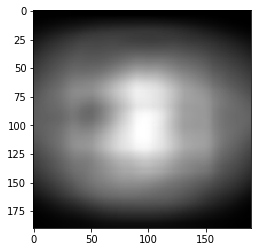

In [119]:
# Compute linear convolution
f4 = signal.convolve2d(h, f, mode='full', boundary='fill')
a = int(sx-np.ceil(sx/2))
b = int(sx+np.floor(sx/2))
f4 = f4[a:b,a:b]
#fig = plt.figure()
#imgplot = plt.imshow(abs(f3),cmap='gray')

# Compute linear convolution using the FFT
fzp = np.zeros([2*sx,2*sy])
fzp[a:b,a:b] = f
hzp = np.zeros([2*sx,2*sy])
hzp[a:b,a:b] = h
fhat = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(fzp)))
hhat = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(hzp)))
f5 = np.real(np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(fhat*hhat))))
f5 = f5[a:b,a:b]
fig = plt.figure()
imgplot = plt.imshow((f5),cmap='gray')
print(alg.norm(abs(f5-f4))/alg.norm(f5))

In [114]:
print(alg.norm(abs(f5-f4))/alg.norm(f5))

2.1383689488113376e-16
